In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("xy_data.csv")
x_obs = data['x'].values
y_obs = data['y'].values

N = len(data)
t_vals = np.linspace(6, 60, N)

Saving xy_data.csv to xy_data (1).csv


In [ ]:
def parametric_curve(t, theta, M, X):
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y


In [ ]:
def l1_loss(params, t, x_obs, y_obs):
    theta, M, X = params
    x_pred, y_pred = parametric_curve(t, theta, M, X)
    return np.sum(np.abs(x_pred - x_obs) + np.abs(y_pred - y_obs))

In [ ]:
bounds = [
    (np.deg2rad(0), np.deg2rad(50)),
    (-0.05, 0.05),
    (0, 100)
]
initial_guess = [np.deg2rad(25), 0, 50]
result = minimize(
    l1_loss, initial_guess,
    args=(t_vals, x_obs, y_obs),
    bounds=bounds,
    method='L-BFGS-B'
)

theta_opt, M_opt, X_opt = result.x
print("Optimal θ (degrees):", np.rad2deg(theta_opt))
print("Optimal M:", M_opt)
print("Optimal X:", X_opt)


Optimal θ (degrees): 28.118388272301964
Optimal M: 0.021388762382235995
Optimal X: 54.900786029932206


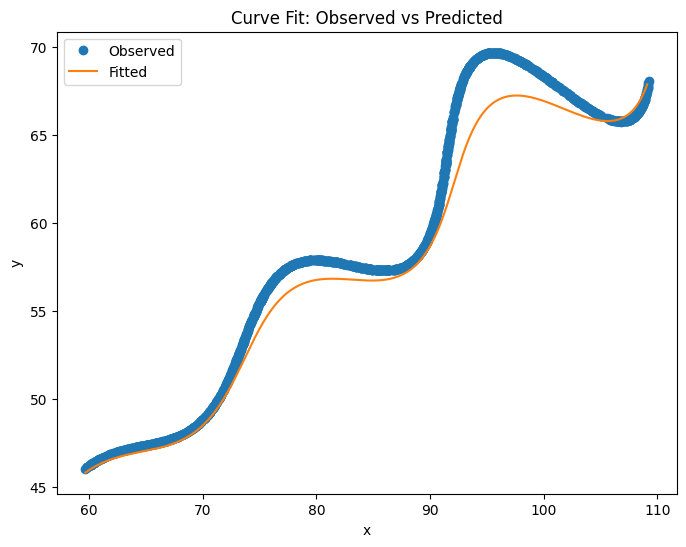

In [ ]:
x_fit, y_fit = parametric_curve(t_vals, theta_opt, M_opt, X_opt)

plt.figure(figsize=(8,6))
plt.plot(x_obs, y_obs, 'o', label='Observed')
plt.plot(x_fit, y_fit, '-', label='Fitted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Curve Fit: Observed vs Predicted')
plt.show()